In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Read in data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Ananya_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2018_Top_Songs.csv')
Ananya_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2019_Top_Songs.csv')
Ananya_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2020_Top_Songs.csv')
Ananya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2021_Top_Songs.csv')
Ananya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2022_Top_Songs.csv')
Ananya_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2023_Top_Songs.csv')

Arushi_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2018_Top_Songs.csv')
Arushi_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2019_Top_Songs.csv')
Arushi_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2020_Top_Songs.csv')
Arushi_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2021_Top_Songs.csv')
Arushi_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2022_Top_Songs.csv')
Arushi_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2023_Top_Songs.csv')

Ritika_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2018_Top_Songs.csv')
Ritika_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2019_Top_Songs.csv')
Ritika_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2020_Top_Songs.csv')
Ritika_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2021_Top_Songs.csv')
Ritika_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2022_Top_Songs.csv')
Ritika_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2023_Top_Songs.csv')

Shriya_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2018_Top_Songs.csv')
Shriya_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2019_Top_Songs.csv')
Shriya_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2020_Top_Songs.csv')
Shriya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2021_Top_Songs.csv')
Shriya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2022_Top_Songs.csv')
Shriya_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2023_Top_Songs.csv')

In [5]:
ananya_df_concat = pd.concat([Ananya_df_2018, Ananya_df_2019, Ananya_df_2020, Ananya_df_2021, Ananya_df_2022, Ananya_df_2023], ignore_index=True, axis=0)
arushi_df_concat = pd.concat([Arushi_df_2018, Arushi_df_2019, Arushi_df_2020, Arushi_df_2021, Arushi_df_2022, Arushi_df_2023], ignore_index=True, axis=0)
ritika_df_concat = pd.concat([Ritika_df_2018, Ritika_df_2019, Ritika_df_2020, Ritika_df_2021, Ritika_df_2022, Ritika_df_2023], ignore_index=True, axis=0)
shriya_df_concat = pd.concat([Shriya_df_2018, Shriya_df_2019, Shriya_df_2020, Shriya_df_2021, Shriya_df_2022, Shriya_df_2023], ignore_index=True, axis=0)
all_df_concat = pd.concat([ananya_df_concat, arushi_df_concat, ritika_df_concat, shriya_df_concat], ignore_index=True, axis=0)

## Prepare data for machine learning models

### Convert numeric variables to scale of [0,1]

In [6]:
# Funtion also used in "01_Data_Visualization.ipynb"
# Create function to do linear transformation on variable to change value to [0,1]
def convert_scale(df, col):
    df[col + '_old'] = df[col]
    new_max = 1
    new_min = 0
    new_range = new_max-new_min
    max_val = df[col].max()
    min_val=df[col].min()
    val_range = max_val - min_val
    df[col]=df[col].apply(lambda x: (((x-min_val)*new_range)/val_range)+new_min)
    return

In [7]:
numeric_cols = ['length',
                'popularity',
                'acousticness',
                'danceability',
                'energy',
                'instrumentalness',
                'liveness',
                'loudness',
                'speechiness',
                'valence',
                'tempo',
                'release_year']

for col in numeric_cols:
    convert_scale(all_df_concat, col)

In [8]:
df_all_adj = all_df_concat.copy()
# df_all_adj

### Onehot encode categorical variables

In [9]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df_all_adj[['time_signature', 'mode', 'key']])
onehot = pd.DataFrame(oe_results.toarray(), columns=['time_signature_1', 'time_signature_2',
                                                     'time_signature_3', 'time_signature_4',
                                                     'mode_1', 'mode_2',
                                                     'key_1', 'key_2','key_3','key_4','key_5', 'key_6',
                                                     'key_7', 'key_8','key_9','key_10','key_11', 'key_12'])
df_all_adj = pd.concat([df_all_adj, onehot], axis=1)
# df_all_adj.T

In [10]:
model_feature_cols = ['energy',
    'valence',
    'danceability',
    'liveness',
    'speechiness',
    'instrumentalness',
    'acousticness',
    'loudness',
    'length',
    'popularity',
    'tempo',
    'release_year',
    'time_signature_1',
    'time_signature_2',
    'time_signature_3',
    'time_signature_4',
    'mode_1',
    'mode_2',
    'key_1',
    'key_2',
    'key_3',
    'key_4',
    'key_5',
    'key_6',
    'key_7',
    'key_8',
    'key_9',
    'key_10',
    'key_11',
     'key_12']

model_y_cols = ['name',
                'album',
                'artist']

In [11]:
ananya_df_concat.shape


(600, 20)

In [12]:
df_all_adj.shape

(2400, 50)

In [13]:
df_all_adj = df_all_adj[model_feature_cols + model_y_cols]

df_all_adj['true_label'] = ['0'] * 1200 + ['1'] * 1200

ananya_df_concat = df_all_adj.iloc[:600]
arushi_df_concat = df_all_adj.iloc[600:1200].reset_index()
ritika_df_concat = df_all_adj.iloc[1200:1800].reset_index()
shriya_df_concat = df_all_adj.iloc[1800:].reset_index()


### Remove repeated songs

In [14]:
# remove repeats on individual playlists
def remove_repeats(df):
  rows_old = range(len(df))
  rows_new = []
  skips = []
  for i in range(len(df)):
    for j in range(i+1, len(df)):
      if(df['name'][i] == df['name'][j]) and (df['artist'][i] == df['artist'][j]):
        skips.append(j)
  for row in rows_old:
    if not row in skips:
      rows_new.append(row)
  df = df.iloc[rows_new,:].reset_index(drop=True)
  return df

In [15]:
df_ananya_no_repeats = remove_repeats(ananya_df_concat)
df_arushi_no_repeats = remove_repeats(arushi_df_concat)
df_ritika_no_repeats = remove_repeats(ritika_df_concat)
df_shriya_no_repeats = remove_repeats(shriya_df_concat)

print(len(df_ananya_no_repeats),len(df_arushi_no_repeats),len(df_ritika_no_repeats), len(df_shriya_no_repeats))

474 524 554 570


### Remove songs if they have all categories

In [16]:
def remove_same_songs(df1, df2, df3, df4):
    rows_old_df1 = range(len(df1))
    rows_new_df1 = []

    rows_old_df2 = range(len(df2))
    rows_new_df2 = []

    rows_old_df3 = range(len(df3))
    rows_new_df3 = []

    rows_old_df4 = range(len(df4))
    rows_new_df4 = []

    same_songs_df1 = []
    same_songs_df2 = []
    same_songs_df3 = []
    same_songs_df4 = []

    # Check for duplicates between df1 and df2
    for i in range(len(df1)):
        for j in range(len(df2)):
            if (df1['name'][i] == df2['name'][j]) and (df1['artist'][i] == df2['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df2.append(j)

    # Check for duplicates between df1 and df3
    for i in range(len(df1)):
        for j in range(len(df3)):
            if (df1['name'][i] == df3['name'][j]) and (df1['artist'][i] == df3['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df3.append(j)

    # Check for duplicates between df1 and df4
    for i in range(len(df1)):
        for j in range(len(df4)):
            if (df1['name'][i] == df4['name'][j]) and (df1['artist'][i] == df4['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df4.append(j)

    # Check for duplicates between df2 and df3
    for i in range(len(df2)):
        for j in range(len(df3)):
            if (df2['name'][i] == df3['name'][j]) and (df2['artist'][i] == df3['artist'][j]):
                same_songs_df2.append(i)
                same_songs_df3.append(j)

    # Check for duplicates between df2 and df4
    for i in range(len(df2)):
        for j in range(len(df4)):
            if (df2['name'][i] == df4['name'][j]) and (df2['artist'][i] == df4['artist'][j]):
                same_songs_df2.append(i)
                same_songs_df4.append(j)

    # Check for duplicates between df3 and df4
    for i in range(len(df3)):
        for j in range(len(df4)):
            if (df3['name'][i] == df4['name'][j]) and (df3['artist'][i] == df4['artist'][j]):
                same_songs_df3.append(i)
                same_songs_df4.append(j)

    for row in rows_old_df1:
        if row not in same_songs_df1:
            rows_new_df1.append(row)

    for row in rows_old_df2:
        if row not in same_songs_df2:
            rows_new_df2.append(row)

    for row in rows_old_df3:
        if row not in same_songs_df3:
            rows_new_df3.append(row)

    for row in rows_old_df4:
        if row not in same_songs_df4:
            rows_new_df4.append(row)

    df1_result = df1.iloc[rows_new_df1, :].reset_index(drop=True)
    df2_result = df2.iloc[rows_new_df2, :].reset_index(drop=True)
    df3_result = df3.iloc[rows_new_df3, :].reset_index(drop=True)
    df4_result = df4.iloc[rows_new_df4, :].reset_index(drop=True)

    return df1_result, df2_result, df3_result, df4_result

In [17]:
df_ananya_no_repeats_no_same, df_arushi_no_repeats_no_same, df_ritika_no_repeats_no_same, df_shriya_no_repeats_no_same = remove_same_songs(
    df_ananya_no_repeats,
    df_arushi_no_repeats,
    df_ritika_no_repeats,
    df_shriya_no_repeats
)

print(len(df_ananya_no_repeats_no_same))
print(len(df_arushi_no_repeats_no_same))
print(len(df_ritika_no_repeats_no_same))
print(len(df_shriya_no_repeats_no_same))

286
367
381
425


### Upsample smaller category so number of samples per class size is equal

In [18]:
# upsample adam for same size categories
def add_missing_songs(df, n, state):
    r = np.random.RandomState(seed=state)
    new_samples = r.choice(df.shape[0], size=n, replace=False)
    new_df = pd.concat([df,  df.iloc[new_samples,:]], ignore_index=True, axis=0)
    return new_df

In [19]:
df_ananya_no_repeats_no_same_up_sampled = add_missing_songs(df_ananya_no_repeats_no_same, 139, 42)
df_arushi_no_repeats_no_same_up_sampled = add_missing_songs(df_arushi_no_repeats_no_same, 58, 42)
df_ritika_no_repeats_no_same_up_sampled = add_missing_songs(df_ritika_no_repeats_no_same, 44, 42)
# df_adam_no_repeats_no_same_up_sampled

In [20]:
def limit_features(df):
    return df[model_feature_cols]

In [21]:
ananya_features = limit_features(df_ananya_no_repeats_no_same_up_sampled)
arushi_features = limit_features(df_arushi_no_repeats_no_same_up_sampled)
ritika_features = limit_features(df_ritika_no_repeats_no_same_up_sampled)
shriya_features = limit_features(df_shriya_no_repeats_no_same)

### Get training and test sets

In [22]:
def get_train_test(df, n, state):
    r = np.random.RandomState(seed=state)
    new_samples = list(r.choice(df.shape[0], size=n, replace=False))

    train_1 = new_samples[0:336] + new_samples[420:426] #342
    test_1 = new_samples[336:420]

    train_2 = new_samples[0:252] + new_samples[336:420] + new_samples[420:426] #342
    test_2 = new_samples[252:336]

    train_3 = new_samples[0:168] + new_samples[252:420] + new_samples[420:426]  #342
    test_3 = new_samples[168:252]

    train_4 = new_samples[0:84] + new_samples[168:420] + new_samples[420:426] #342
    test_4 = new_samples[84:168]

    train_5 = new_samples[168:420] + new_samples[420:426]  #258
    test_5 = new_samples[0:84]

#     print(new_samples)

    return train_1, test_1, train_2, test_2, train_3, test_3, train_4, test_4, train_5, test_5

In [23]:
train_test_ananya = get_train_test(df_ananya_no_repeats_no_same_up_sampled,
                            df_ananya_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1_ananya, test_1_ananya, train_2_ananya, test_2_ananya, train_3_ananya, test_3_ananya, train_4_ananya, test_4_ananya, train_5_ananya, test_5_ananya = train_test_ananya

train_test_arushi = get_train_test(df_arushi_no_repeats_no_same_up_sampled,
                            df_arushi_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1_arushi, test_1_arushi, train_2_arushi, test_2_arushi, train_3_arushi, test_3_arushi, train_4_arushi, test_4_arushi, train_5_arushi, test_5_arushi = train_test_arushi

train_test_ritika = get_train_test(df_ritika_no_repeats_no_same_up_sampled,
                            df_ritika_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1_ritika, test_1_ritika, train_2_ritika, test_2_ritika, train_3_ritika, test_3_ritika, train_4_ritika, test_4_ritika, train_5_ritika, test_5_ritika = train_test_ritika

train_test_shriya = get_train_test(df_shriya_no_repeats_no_same,
                            df_shriya_no_repeats_no_same.shape[0],
                            42)

train_1_shriya, test_1_shriya, train_2_shriya, test_2_shriya, train_3_shriya, test_3_shriya, train_4_shriya, test_4_shriya, train_5_shriya, test_5_shriya = train_test_shriya

In [24]:
ananya_train_1 = ananya_features.iloc[train_1_ananya,:]
ananya_train_2 = ananya_features.iloc[train_2_ananya,:]
ananya_train_3 = ananya_features.iloc[train_3_ananya,:]
ananya_train_4 = ananya_features.iloc[train_4_ananya,:]
ananya_train_5 = ananya_features.iloc[train_5_ananya,:]

arushi_train_1 = arushi_features.iloc[train_1_arushi,:]
arushi_train_2 = arushi_features.iloc[train_2_arushi,:]
arushi_train_3 = arushi_features.iloc[train_3_arushi,:]
arushi_train_4 = arushi_features.iloc[train_4_arushi,:]
arushi_train_5 = arushi_features.iloc[train_5_arushi,:]

ritika_train_1 = ritika_features.iloc[train_1_ritika,:]
ritika_train_2 = ritika_features.iloc[train_2_ritika,:]
ritika_train_3 = ritika_features.iloc[train_3_ritika,:]
ritika_train_4 = ritika_features.iloc[train_4_ritika,:]
ritika_train_5 = ritika_features.iloc[train_5_ritika,:]

shriya_train_1 = shriya_features.iloc[train_1_shriya,:]
shriya_train_2 = shriya_features.iloc[train_2_shriya,:]
shriya_train_3 = shriya_features.iloc[train_3_shriya,:]
shriya_train_4 = shriya_features.iloc[train_4_shriya,:]
shriya_train_5 = shriya_features.iloc[train_5_shriya,:]

In [25]:
ananya_test_1 = ananya_features.iloc[test_1_ananya,:]
ananya_test_2 = ananya_features.iloc[test_2_ananya,:]
ananya_test_3 = ananya_features.iloc[test_3_ananya,:]
ananya_test_4 = ananya_features.iloc[test_4_ananya,:]
ananya_test_5 = ananya_features.iloc[test_5_ananya,:]

arushi_test_1 = arushi_features.iloc[test_1_arushi,:]
arushi_test_2 = arushi_features.iloc[test_2_arushi,:]
arushi_test_3 = arushi_features.iloc[test_3_arushi,:]
arushi_test_4 = arushi_features.iloc[test_4_arushi,:]
arushi_test_5 = arushi_features.iloc[test_5_arushi,:]

ritika_test_1 = ritika_features.iloc[test_1_ritika,:]
ritika_test_2 = ritika_features.iloc[test_2_ritika,:]
ritika_test_3 = ritika_features.iloc[test_3_ritika,:]
ritika_test_4 = ritika_features.iloc[test_4_ritika,:]
ritika_test_5 = ritika_features.iloc[test_5_ritika,:]

shriya_test_1 = shriya_features.iloc[test_1_shriya,:]
shriya_test_2 = shriya_features.iloc[test_2_shriya,:]
shriya_test_3 = shriya_features.iloc[test_3_shriya,:]
shriya_test_4 = shriya_features.iloc[test_4_shriya,:]
shriya_test_5 = shriya_features.iloc[test_5_shriya,:]

In [26]:
def get_train_and_test(ananya_train, arushi_train, ritika_train, shriya_train, ananya_test, arushi_test, ritika_test, shriya_test):
    train_X = pd.concat([ananya_train, arushi_train, ritika_train, shriya_train])
    test_X = pd.concat([ananya_test, arushi_test, ritika_test, shriya_test])
    train_y = ([0]*len(ananya_train)) + ([1]*len(arushi_train)) + ([2]*len(ritika_train)) + ([3]*len(shriya_train))
    test_y = ([0]*len(ananya_test)) + ([1]*len(arushi_test)) + ([2]*len(ritika_test)) + ([3]*len(shriya_test))
    return train_X, test_X, train_y, test_y

In [27]:
train_X_1, test_X_1, train_y_1, test_y_1 = get_train_and_test(ananya_train_1,
                                                              arushi_train_1,
                                                              ritika_train_1,
                                                              shriya_train_1,
                                                              ananya_test_1,
                                                              arushi_test_1,
                                                              ritika_test_1,
                                                              shriya_test_1)
train_X_2, test_X_2, train_y_2, test_y_2 = get_train_and_test(ananya_train_2,
                                                              arushi_train_2,
                                                              ritika_train_2,
                                                              shriya_train_2,
                                                              ananya_test_2,
                                                              arushi_test_2,
                                                              ritika_test_2,
                                                              shriya_test_2)
train_X_3, test_X_3, train_y_3, test_y_3 = get_train_and_test(ananya_train_3,
                                                              arushi_train_3,
                                                              ritika_train_3,
                                                              shriya_train_3,
                                                              ananya_test_3,
                                                              arushi_test_3,
                                                              ritika_test_3,
                                                              shriya_test_3)
train_X_4, test_X_4, train_y_4, test_y_4 = get_train_and_test(ananya_train_4,
                                                              arushi_train_4,
                                                              ritika_train_4,
                                                              shriya_train_4,
                                                              ananya_test_4,
                                                              arushi_test_4,
                                                              ritika_test_4,
                                                              shriya_test_4)
train_X_5, test_X_5, train_y_5, test_y_5 = get_train_and_test(ananya_train_5,
                                                              arushi_train_5,
                                                              ritika_train_5,
                                                              shriya_train_5,
                                                              ananya_test_5,
                                                              arushi_test_5,
                                                              ritika_test_5,
                                                              shriya_test_5)

### Evaluation functions

In [28]:
def accuracy(conf_matrix):
    # Assuming conf_matrix is a 4x4 confusion matrix
    num_classes = len(conf_matrix)
    total_correct = sum(conf_matrix[i][i] for i in range(num_classes))
    total_predictions = sum(sum(conf_matrix[i]) for i in range(num_classes))
    return total_correct / total_predictions

In [29]:
def precision(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    return tp / (tp + fp)

In [30]:
def recall(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fn = sum(conf_matrix[class_index][i] for i in range(len(conf_matrix)) if i != class_index)
    return tp / (tp + fn)

In [31]:
def specificity(conf_matrix, class_index):
    # Calculate true negatives (TN) for the specified class
    tn = sum(conf_matrix[i][j] for i in range(len(conf_matrix)) for j in range(len(conf_matrix)) if i != class_index and j != class_index)
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    return tn / (tn + fp)

In [32]:
def f1(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    fn = sum(conf_matrix[class_index][i] for i in range(len(conf_matrix)) if i != class_index)
    precision_ = tp / (tp + fp)
    recall_ = tp / (tp + fn)
    return 2 * precision_ * recall_ / (precision_ + recall_)

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_multiclass(title, y_true, y_scores, n_classes, save=False):
    plt.figure(figsize=(8, 6))
    plt.title(title)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    if save:
        plt.savefig(save, bbox_inches='tight')

    plt.show()

In [34]:
def plot_pr_curve(y_test, y_score, title='', save=False):
    # Assuming you have four classes, adjust the plotting accordingly
    precision, recall, thresholds = [], [], []
    for i in range(4):
        precision_i, recall_i, thresholds_i = precision_recall_curve(y_test[:, i], y_score[:, i])
        precision.append(precision_i)
        recall.append(recall_i)
        thresholds.append(thresholds_i)

    # create precision recall curve
    fig, ax = plt.subplots()

    # Assuming you have four classes, adjust the plotting accordingly
    ax.plot(recall[0], precision[0], color='purple', label='Class 0')
    ax.plot(recall[1], precision[1], color='blue', label='Class 1')
    ax.plot(recall[2], precision[2], color='green', label='Class 2')
    ax.plot(recall[3], precision[3], color='orange', label='Class 3')

    # add axis labels to plot
    ax.set_title(title)  # Add title
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    plt.legend()  # Add legend for each class

    # display plot
    if save:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

### Compare predictions to actual

In [35]:
def compare_predictions_Ananya(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[:84]
    test_set.loc[:,'prediction_probability'] = preds_[:84]
    test_set['actual'] = actual[:84]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction', ascending=True).reset_index()
    return test_set

def compare_predictions_Arushi(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[84:168]
    test_set.loc[:,'prediction_probability'] = preds_[84:168]
    test_set['actual'] = actual[84:168]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set

def compare_predictions_Ritika(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[168:252]
    test_set.loc[:,'prediction_probability'] = preds_[168:252]
    test_set['actual'] = actual[168:252]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set

def compare_predictions_Shriya(preds, preds_, actual, test_set, df_X_no_repeats_no_same):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds[252:]
    test_set.loc[:,'prediction_probability'] = preds_[252:]
    test_set['actual'] = actual[252:]
    test_set.loc[:,'name'] = df_X_no_repeats_no_same.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=True).reset_index()
    return test_set

### Decision tree

In [36]:
dt = DecisionTreeClassifier(random_state=42)

In [37]:
# define search space
space = dict()

space['criterion'] = ['gini', 'entropy']
space['splitter'] = ['best', 'random']
space['max_depth'] = [1,2,3,4,5,8,10, 12, 15]
space['min_samples_split'] = [2,5,10,15,20,25,30,35,40]
space['min_samples_leaf'] = [1,2,3,4,5,8,10,12,15]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

# define search
search = GridSearchCV(dt, space, scoring='accuracy', cv=cv)

# execute search
result = search.fit(X=train_X_1, y=train_y_1)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5146951088127558
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [38]:
dt = DecisionTreeClassifier(random_state=42,
                            criterion='gini',
                            max_depth=12,
                            min_samples_leaf=1,
                            min_samples_split=5,
                            splitter='best')

In [39]:
dt.fit(X=train_X_1, y=train_y_1)
preds = dt.predict(X=test_X_1)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = dt.predict_proba(test_X_1)[:,1]


# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = dt.predict_proba(test_X_1)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[39, 14, 11, 20],
       [16, 43,  7, 18],
       [ 6, 21, 36, 21],
       [12, 18, 21, 33]])

In [40]:
accuracy(conf_matrix)

0.4494047619047619

In [41]:
precision(conf_matrix,0)

0.5342465753424658

<Axes: >

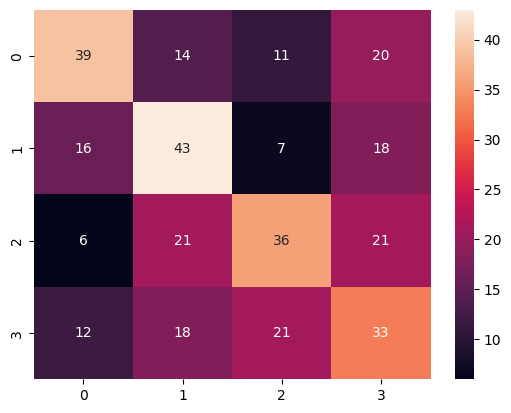

In [42]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [43]:
recall(conf_matrix,1)

0.5119047619047619

In [44]:
specificity(conf_matrix,0)

0.8650793650793651

In [45]:
f1(conf_matrix,0)

0.4968152866242039

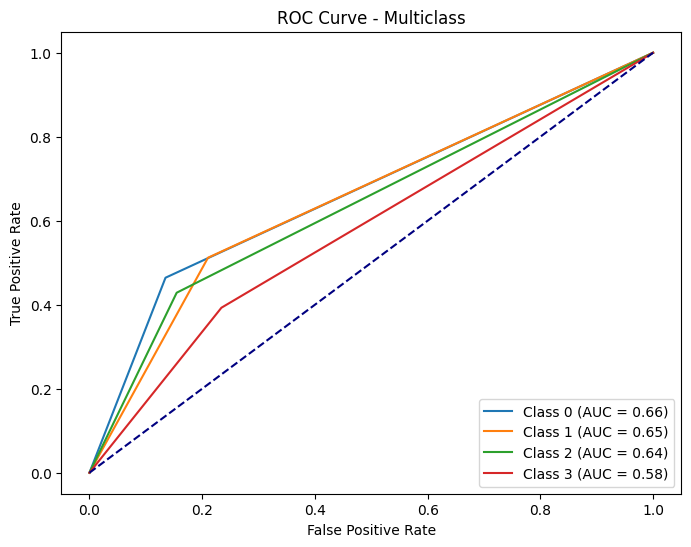

In [46]:
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')


Average Precision Score (Class 0): 0.42112067022838495
Average Precision Score (Class 1): 0.36782274895100553
Average Precision Score (Class 2): 0.39313410470846055
Average Precision Score (Class 3): 0.32652402764384836
Macro-average Average Precision Score: 0.3771503878829248


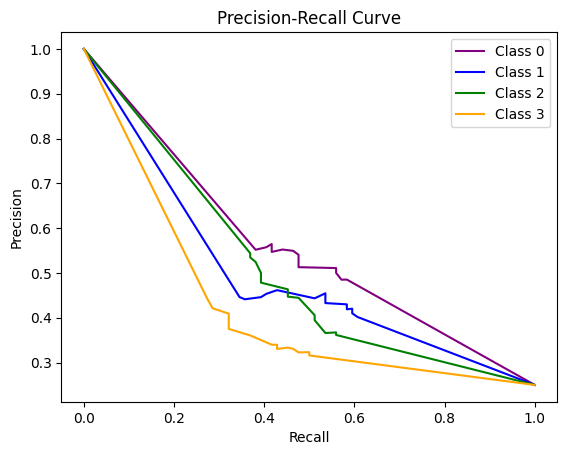

In [47]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve')

In [48]:
dt.fit(X=train_X_2, y=train_y_2)
preds = dt.predict(X=test_X_2)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = dt.predict_proba(test_X_2)[:,1]


# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = dt.predict_proba(test_X_2)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[51,  9, 15,  9],
       [15, 45,  8, 16],
       [15,  9, 30, 30],
       [11, 25, 18, 30]])

In [49]:
accuracy(conf_matrix)

0.4642857142857143

<Axes: >

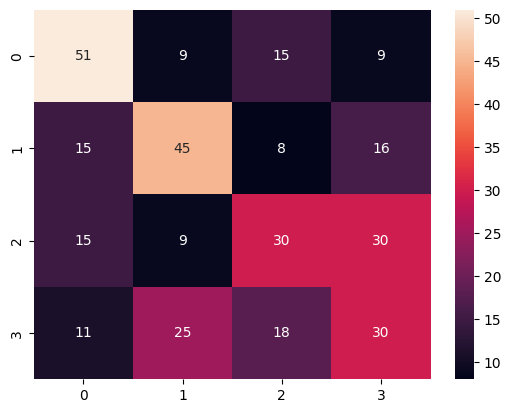

In [50]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [51]:
precision(conf_matrix,0)

0.5543478260869565

In [52]:
recall(conf_matrix,1)

0.5357142857142857

In [53]:
specificity(conf_matrix,0)

0.8373015873015873

In [54]:
f1(conf_matrix,1)

0.5232558139534884

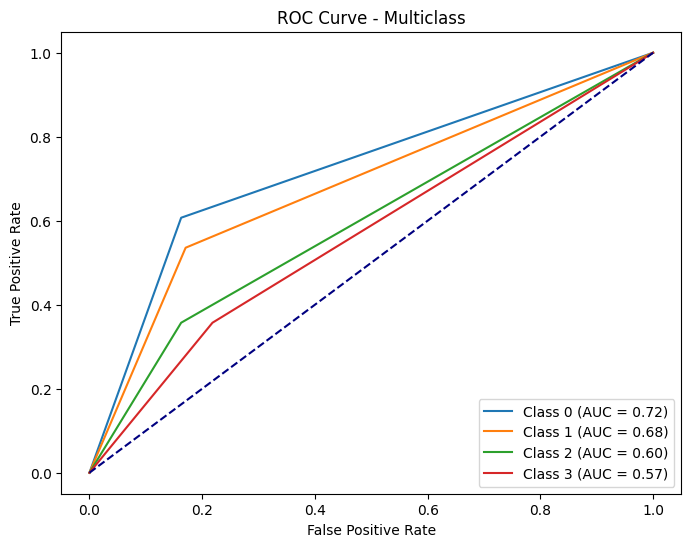

In [55]:
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')


Average Precision Score (Class 0): 0.5247607949483165
Average Precision Score (Class 1): 0.4470607094105552
Average Precision Score (Class 2): 0.3502659999285035
Average Precision Score (Class 3): 0.3245478457779821
Macro-average Average Precision Score: 0.41165883751633936


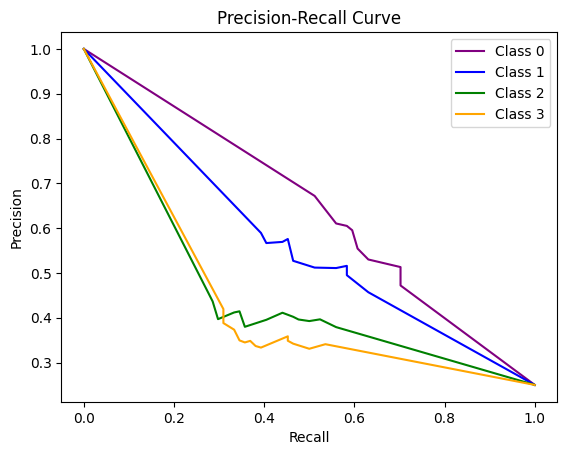

In [56]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve')

In [57]:
dt.fit(X=train_X_3, y=train_y_3)
preds = dt.predict(X=test_X_3)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = dt.predict_proba(test_X_3)[:,1]


# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = dt.predict_proba(test_X_3)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[59, 10,  6,  9],
       [ 9, 42, 14, 19],
       [15, 11, 39, 19],
       [14, 18, 23, 29]])

In [58]:
accuracy(conf_matrix)

0.5029761904761905

In [59]:
precision(conf_matrix,0)

0.6082474226804123

<Axes: >

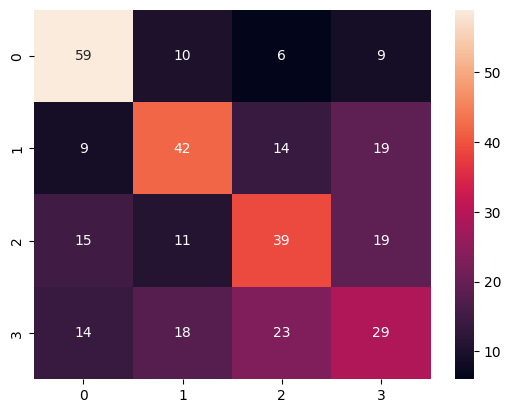

In [60]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [61]:
recall(conf_matrix,1)

0.5

In [62]:
specificity(conf_matrix,0)

0.8492063492063492

In [63]:
f1(conf_matrix,1)

0.509090909090909

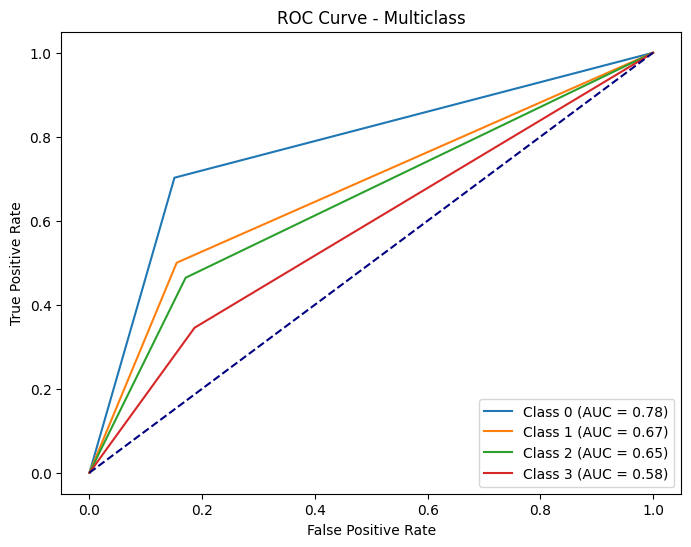

In [64]:
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')


Average Precision Score (Class 0): 0.5625630999662968
Average Precision Score (Class 1): 0.4010444618063199
Average Precision Score (Class 2): 0.37966598736181073
Average Precision Score (Class 3): 0.3056762847450638
Macro-average Average Precision Score: 0.4122374584698728


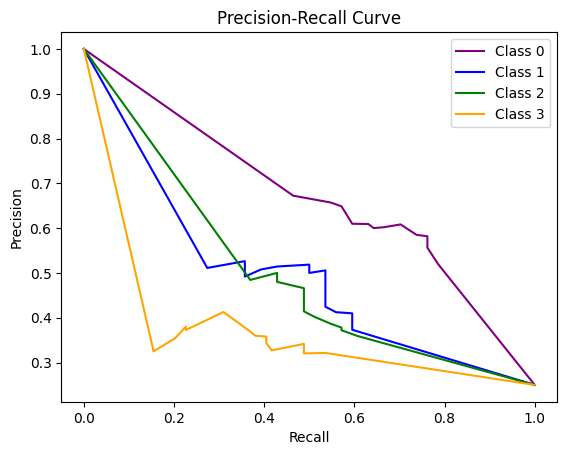

In [65]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve')

In [66]:
dt.fit(X=train_X_4, y=train_y_4)
preds = dt.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = dt.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = dt.predict_proba(test_X_4)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[64, 12,  2,  6],
       [12, 49, 14,  9],
       [12,  9, 41, 22],
       [16, 21, 19, 28]])

In [67]:
accuracy(conf_matrix)

0.5416666666666666

<Axes: >

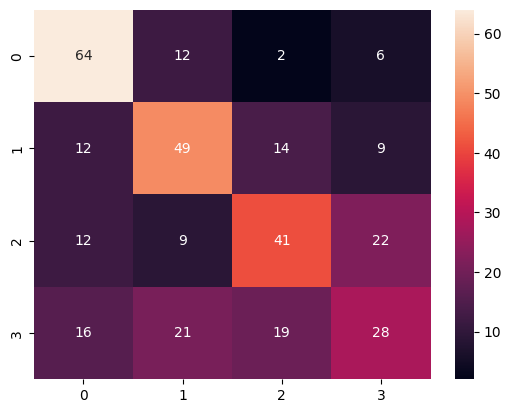

In [68]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [69]:
precision(conf_matrix,0)

0.6153846153846154

In [70]:
recall(conf_matrix,1)

0.5833333333333334

In [71]:
specificity(conf_matrix,0)

0.8412698412698413

In [72]:
f1(conf_matrix,1)

0.5599999999999999

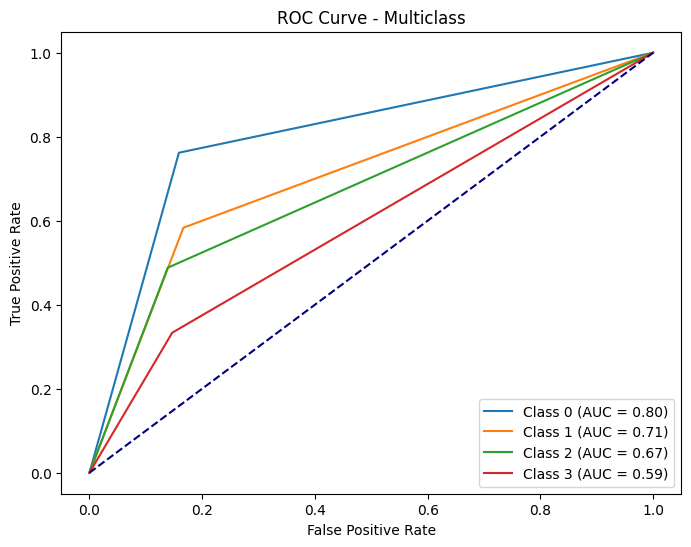

In [73]:
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')


Average Precision Score (Class 0): 0.6218999171804223
Average Precision Score (Class 1): 0.463786966060358
Average Precision Score (Class 2): 0.4437828648020237
Average Precision Score (Class 3): 0.34839773026939796
Macro-average Average Precision Score: 0.46946686957805045


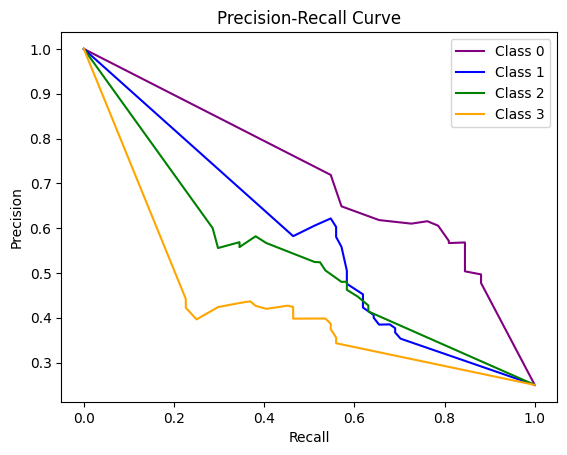

In [74]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve')

In [75]:
# print('roc_auc_score: ', roc_auc_score(actual_values, preds_))
# plot_roc('ROC Curve', false_positive_rate, true_positive_rate)

In [76]:
# print('pr_auc_score: ', average_precision_score(actual_values, preds_))
# plot_pr_curve(actual_values, preds_)

In [77]:
dt.fit(X=train_X_5, y=train_y_5)
preds = dt.predict(X=test_X_5)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = dt.predict_proba(test_X_5)[:,1]


# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = dt.predict_proba(test_X_5)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[63,  8,  7,  6],
       [11, 44, 12, 17],
       [13, 10, 39, 22],
       [24, 14, 20, 26]])

In [78]:
accuracy(conf_matrix)

0.5119047619047619

<Axes: >

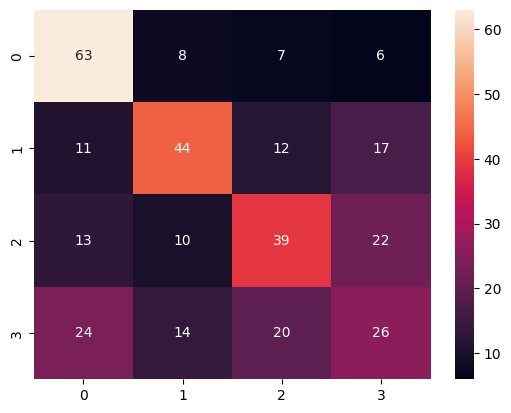

In [79]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [80]:
precision(conf_matrix,0)

0.5675675675675675

In [81]:
recall(conf_matrix,1)

0.5238095238095238

In [82]:
specificity(conf_matrix,0)

0.8095238095238095

In [83]:
f1(conf_matrix,1)

0.5500000000000002

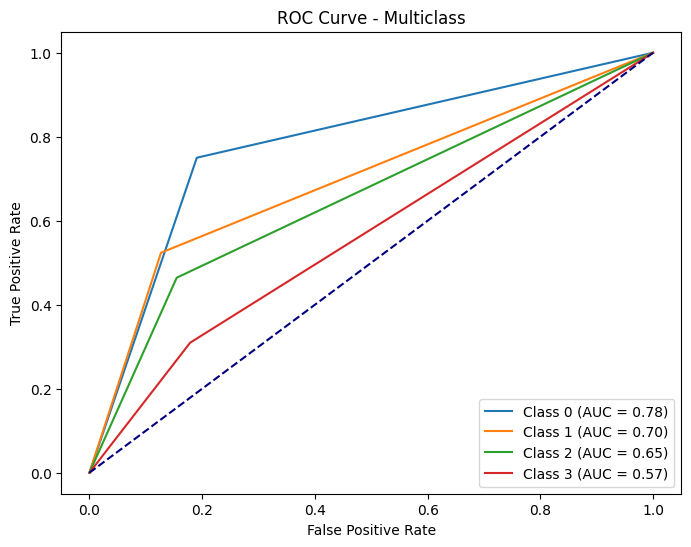

In [84]:
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')


Average Precision Score (Class 0): 0.57656320522221
Average Precision Score (Class 1): 0.4416863988787695
Average Precision Score (Class 2): 0.3911887976319681
Average Precision Score (Class 3): 0.2963593553414866
Macro-average Average Precision Score: 0.42644943926860857


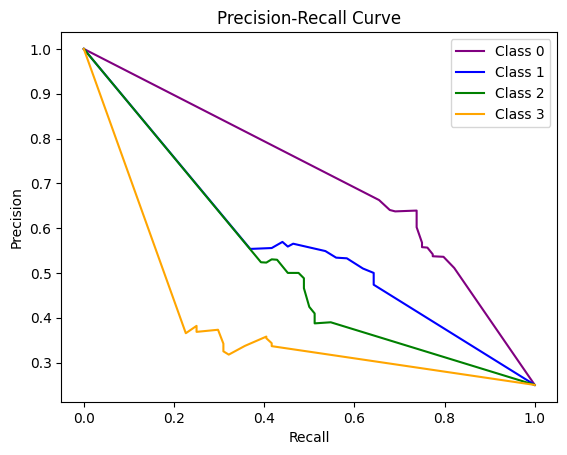

In [85]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve')

#Naive bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB

naive_classifier = MultinomialNB()
naive_classifier.fit(X=train_X_3, y=train_y_3)
preds = naive_classifier.predict(X=test_X_3)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = naive_classifier.predict_proba(test_X_3)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = dt.predict_proba(test_X_3)


conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[45,  9, 13, 17],
       [27, 16, 20, 21],
       [31, 11, 17, 25],
       [25,  8, 18, 33]])

In [87]:
accuracy(conf_matrix)

0.33035714285714285

<Axes: >

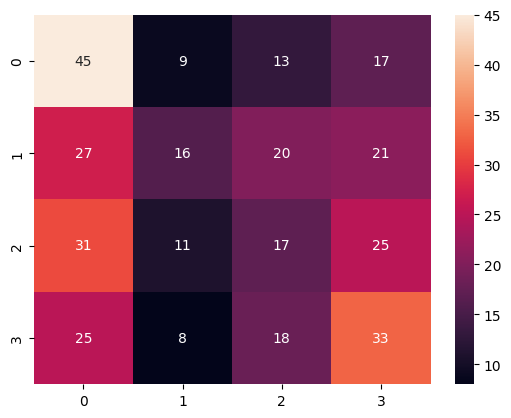

In [88]:
sns.heatmap(conf_matrix, annot=True)

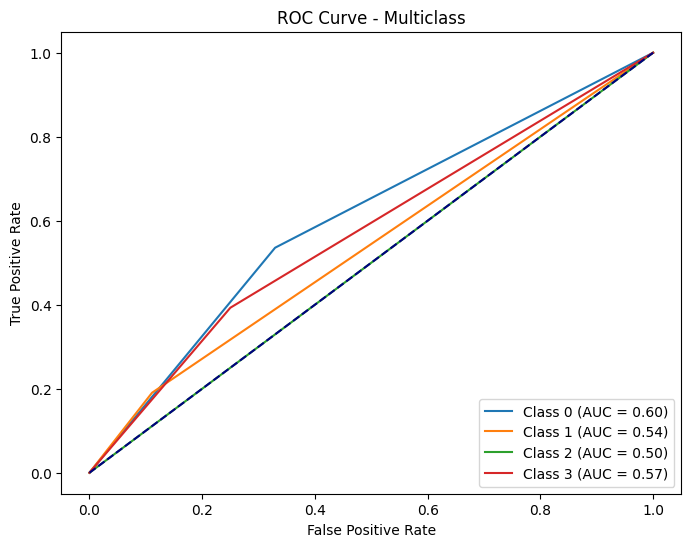

In [89]:
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')


Average Precision Score (Class 0): 0.9738089308661765
Average Precision Score (Class 1): 0.9646620836928181
Average Precision Score (Class 2): 0.971229181955892
Average Precision Score (Class 3): 0.9554389825889691
Macro-average Average Precision Score: 0.9662847947759641


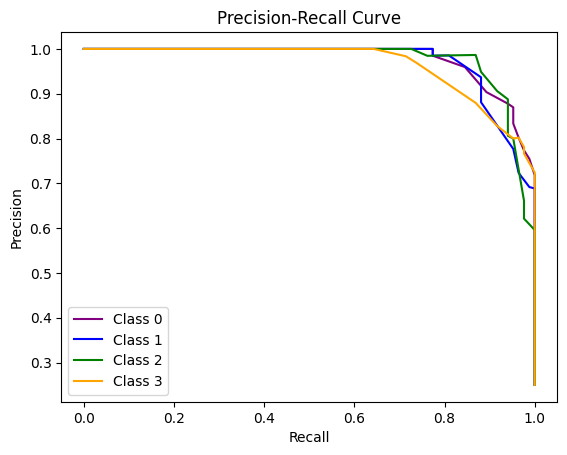

In [90]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve')

#XG BOOST

In [91]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

model = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4, eval_metric='mlogloss' , use_label_encoder =False))
model.fit(X=train_X_4, y=train_y_4)
preds = model.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = model.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = dt.predict_proba(test_X_4)


conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix


array([[72,  4,  3,  5],
       [ 9, 57, 10,  8],
       [ 8, 10, 50, 16],
       [13, 16, 17, 38]])

In [92]:
accuracy(conf_matrix)

0.6458333333333334

<Axes: >

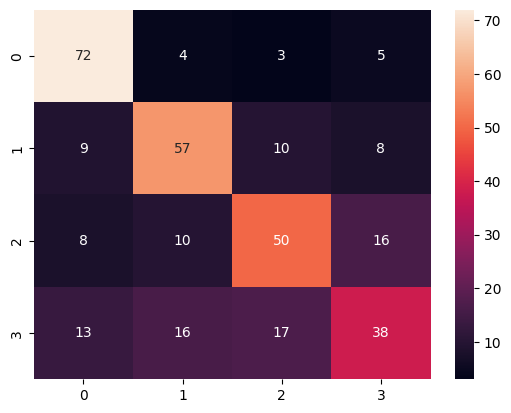

In [93]:
sns.heatmap(conf_matrix, annot=True)

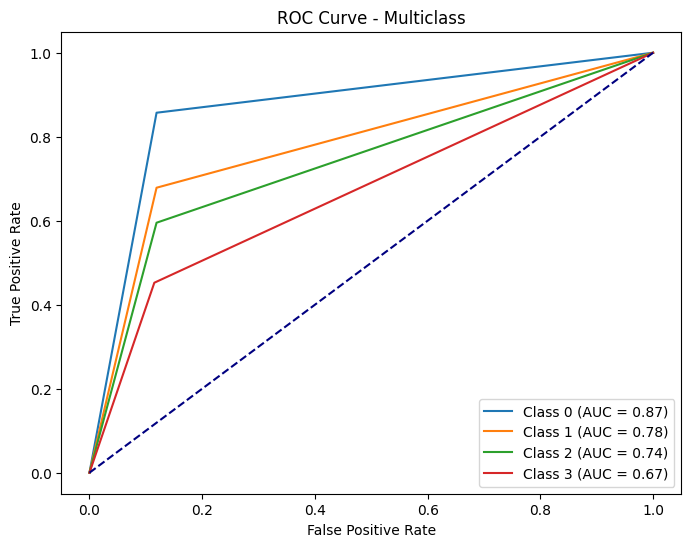

In [94]:
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')


Average Precision Score (Class 0): 0.523999797662204
Average Precision Score (Class 1): 0.4003506100620502
Average Precision Score (Class 2): 0.385105078435957
Average Precision Score (Class 3): 0.28326517957029906
Macro-average Average Precision Score: 0.39818016643262755


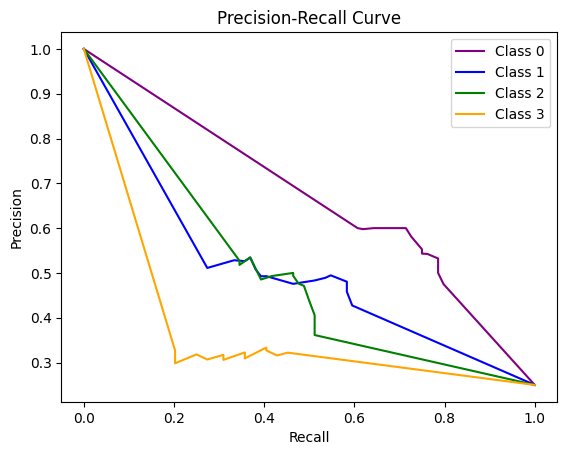

In [95]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve')

In [107]:
Shriya_predictions = compare_predictions_Ritika(preds, preds_, actual_values, shriya_test_3, df_shriya_no_repeats_no_same)
Shriya_predictions = Shriya_predictions[['prediction', 'prediction_probability', 'name', 'artist', 'album']]
Shriya_predictions[Shriya_predictions["prediction"]==3].head(10)

,prediction,prediction_probability,name,artist,album
12,3,0.354131,Follow You,Imagine Dragons,Follow You / Cutthroat
14,3,0.288086,"Zero - From the Original Motion Picture ""Ralph...",Imagine Dragons,Origins (Deluxe)
15,3,0.282049,DOWN (Juicy Juicy),JO YURI,"See You in My 19th Life, Pt. 3 (Original Telev..."
17,3,0.228602,Souvenir,Selena Gomez,Rare (Deluxe)
18,3,0.221011,Secret,Maroon 5,Songs About Jane
20,3,0.195256,Black Swan,BTS,MAP OF THE SOUL : 7
24,3,0.133711,"jealousy, jealousy",Olivia Rodrigo,SOUR
25,3,0.116881,Cry for Me,HUNNY,Pain / Ache / Loving
27,3,0.111871,No Cowards,HANDSOME,No Cowards
35,3,0.071776,Book of Revelation,The Drums,Portamento
